In [1]:
from covid.simulator import Population
from covid.auxilliary import symptom_names
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from covid.policy import Policy

In [5]:
## Baseline simulator parameters
n_genes = 128
n_vaccines = 3 # DO NOT CHANGE, breaks the simulator.
n_treatments = 4
n_population = 10_000
n_symptoms = 10
batch_size = 2000

assert n_population/batch_size == n_population//batch_size, 'the batch size must evenly divide the number of people'


# symptom names for easy reference
from covid.auxilliary import symptom_names

In [6]:
population = Population(n_genes, n_vaccines, n_treatments)

In [7]:
X = population.generate(n_population)
n_features = X.shape[1]

In [8]:
varia = ['age', 'gender','income']
var_num = [10,11,12]


In [43]:
def hist_data(data, varia,var_num):
    for i in range(len(varia)): 
        plt.hist(data[:,var_num[i]], bins=30)
        plt.title("Histogram")
        plt.xlabel(varia[i])
        plt.ylabel("frequency")
        plt.savefig('figures/'+ varia[i] + '_histogram.png')
        plt.show()

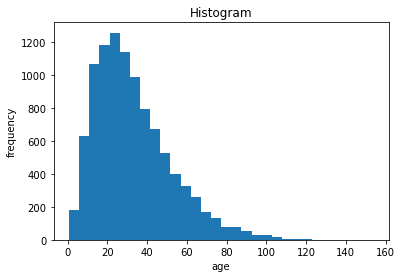

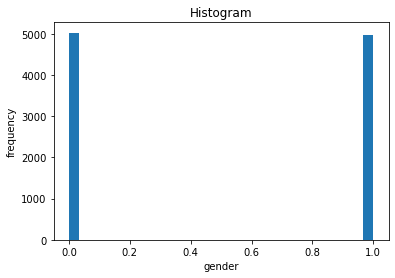

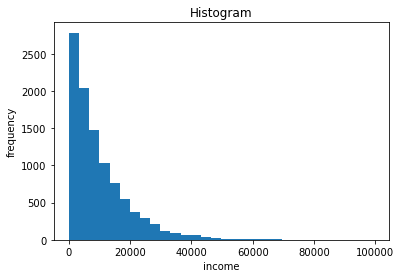

In [44]:
hist_data(data=X, varia=varia, var_num=var_num)

In [41]:
def boot_var(data, varia, var_num, B):

    for i in range(len(varia)): 
        var_mean = []
        for _ in range(B):
            X_boot = np.random.choice(data[:,var_num[i]],replace=True, size=data.shape[0])
            var_mean.append(np.mean(X_boot))

        plt.hist(var_mean, bins=30)
        plt.title("Bootstrap histogram")
        plt.xlabel(varia[i])
        plt.ylabel("frequency")
        plt.savefig('figures/bootstrap' + varia[i] + '.png')
        plt.show()

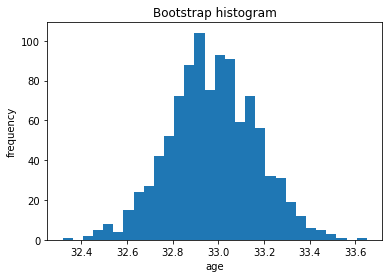

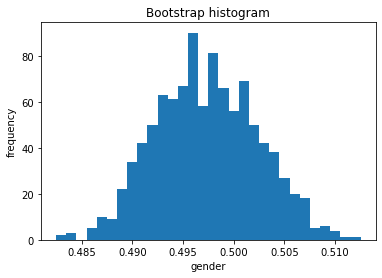

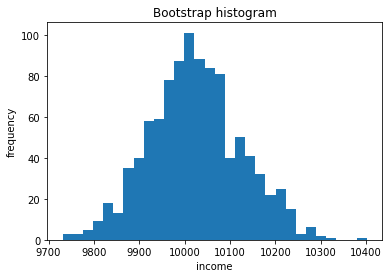

In [42]:
boot_var(data=X, varia=varia, var_num=var_num, B=1000)

In [91]:
###

In [34]:
def plot_age_gender(data):
    mm = np.where(data[:,11]==1) #male
    ff = np.where(data[:,11]==0) #female
    
    sal_m = np.take(data[:,10], mm)
    sal_m = sal_m.flatten()

    sal_f = np.take(data[:,10], ff)
    sal_f = sal_f.flatten()
    plt.hist([sal_m,sal_f],bins=30, label=['male','female'])
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.title('Age per gender')
    plt.legend(loc='upper right')
    plt.savefig('figures/age_per_gender.png')
    plt.show()
    

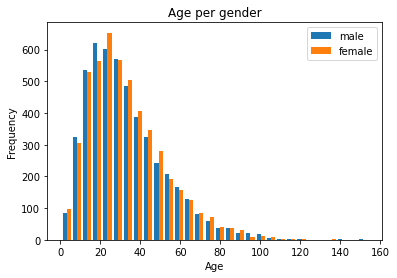

In [35]:
plot_age_gender(X)

In [39]:
def plot_salary_gender(data):
    mm = np.where(data[:,11]==1) #male
    ff = np.where(data[:,11]==0) #female

    inc_m = np.take(data[:,12], mm)
    inc_m = inc_m.flatten()

    inc_f = np.take(data[:,12], ff)
    inc_f = inc_f.flatten()
    plt.hist([inc_m,inc_f],bins=30, label=['male','female'])
    plt.xlabel('Income')
    plt.ylabel('Frequency')
    plt.title('Income per gender')
    plt.legend(loc='upper right')
    plt.savefig('figures/salary_per_gender.png')
    plt.show()

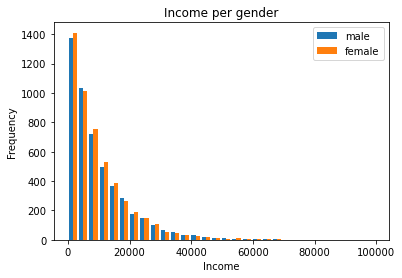

In [40]:
plot_salary_gender(X)

From the first plots we look at the distribution of some of the variables that could tell us aloot about the population. We see that the age of our data is centered between 20-50 years old, which can be a realistic assumption. One problem os however that there is not that much young people, and we also have some very old people (200 years old) which is not realsitic. We also see that our data is balanced in respect to the genders. When it comes to the income of our data, this also looks to reflect a general population.

We also bootsrap our data to see if there is big variation, but it doesnt look to be any big variation in the data.

In the report we also want to mention that the histogram of age is very unreasitically. 
The birth rate has dropped exponentially in a few years and people die with exponential rate after above 25 years. 

Info from office hours: 
* How does the original trainig data affect the fairness of your policy
  * Perhaps look at unfair points in the simulator. 
* Do the original features already imply some biased in data collection: 
  * Strange variabls
    * More relevant from earlier task
  * Unbalanced sample
* Analysis of the decision function: 
  * How are the actions distributed. 
    * F.ex age, how are the vaccine rate among young and old people

# IMPORTANT
* Chrisos said equality of oppurtunity score is not a good critiria. 
  * P(a|x,?) = P(a|x)


 